# SRN - PES1UG20CS186     ASSIGNMENT ID - Covid_9

Performing Data Analysis on the given CSV File

In [88]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [109]:
#reading the csv file from current directory
df = pd.read_csv('9.csv')
df.head(5)

,name,region,cases,cases100k,cases7days,cases7days100k,cases24h,deaths,deaths100k,deaths7days,deaths7days100k,deaths24h
0,Finland,Europe,22967888.0,6938.88,370430.0,NaN,59255.0,369019.0,111.49,6460.0,NaN,992.0
1,Germany,Europe,17787826.0,1288.97,78074.0,5.66,11149.0,236080.0,17.11,938.0,0.07,142.0
2,Montenegro,Europe,11285084.0,5309.14,61584.0,28.97,9384.0,314348.0,147.89,1698.0,0.80,278.0
3,Poland,Europe,4220122.0,6216.48,125535.0,184.92,20837.0,72072.0,106.16,396.0,0.58,64.0
4,Myanmar,South-East Asia,4047551.0,2773.54,NaN,65.34,14290.0,112492.0,77.08,3327.0,2.28,491.0


In [110]:
df.shape

(236, 12)

# Introductory Questions

In [92]:
#q1 fatality rate column creation
#ignoring null values for introductory questions - df1 dataset
df1 = df.dropna() 
df1['fatality rate'] = (df1['deaths']/df1['cases'])*100

<ipython-input-92-8ff80a7783ff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['fatality rate'] = (df1['deaths']/df1['cases'])*100


In [93]:
df1.head(5)

,name,region,cases,cases100k,cases7days,cases7days100k,cases24h,deaths,deaths100k,deaths7days,deaths7days100k,deaths24h,fatality rate
1,Germany,Europe,17787826.0,1288.97,78074.0,5.66,11149.0,236080.0,17.11,938.0,0.07,142.0,1.327200
2,Montenegro,Europe,11285084.0,5309.14,61584.0,28.97,9384.0,314348.0,147.89,1698.0,0.80,278.0,2.785518
3,Poland,Europe,4220122.0,6216.48,125535.0,184.92,20837.0,72072.0,106.16,396.0,0.58,64.0,1.707818
5,Guinea,Africa,3858730.0,4575.26,106608.0,126.40,15744.0,34400.0,40.79,806.0,0.95,114.0,0.891485
6,Saint Pierre and Miquelon,Americas,3580016.0,5504.38,14143.0,21.74,2363.0,60152.0,92.49,116.0,0.18,17.0,1.680216


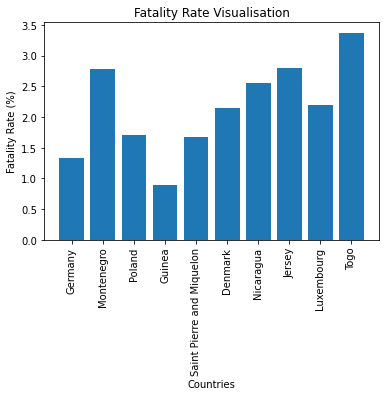

In [188]:
#q2 fatality rate of countries with highest number of cases
#displaying fatality rate for top 10 countries
h_countries = df1.sort_values(by=['cases'], ascending = False).head(10)['name']
frate = df1.sort_values(by=['cases'], ascending = False).head(10)['fatality rate']

plt.bar(h_countries, frate)
plt.xticks(range(len(h_countries)), h_countries, rotation='vertical')
plt.xlabel('Countries')
plt.ylabel('Fatality Rate (%)')
plt.title('Fatality Rate Visualisation')
plt.show()

Question 3 - 
Breaking df1 dataframe into subdataframes according to the region, and calculating mean of cases in last 24 hours in each region.
Storing the means in a 'region':'mean' dictionary named 'record'.
Plotting the keys and values of the dictionary in a bar plot.

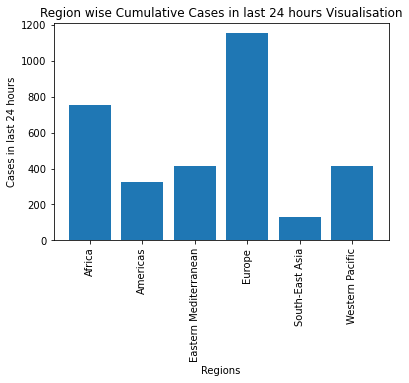

In [205]:
#q3 case count in the last 24 hours in each region
record = {}
for name, daf in df1.groupby('region'):
    if name not in record:
        record[name] = daf['cases24h'].mean()
plt.bar(record.keys(), record.values())
plt.xticks(range(len(record)), record.keys(), rotation='vertical')
plt.xlabel('Regions')
plt.ylabel('Cases in last 24 hours')
plt.title('Region wise Cumulative Cases in last 24 hours Visualisation')
plt.show()

Europe Region is affected the most in last 24 hours, South East Asia shows a recovery mode.

In [96]:
#4 new population column
df1['population'] = (df1['cases']/df1['cases100k'])*100000
df1.head(5)

<ipython-input-96-84900aedd8d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['population'] = (df1['cases']/df1['cases100k'])*100000


,name,region,cases,cases100k,cases7days,cases7days100k,cases24h,deaths,deaths100k,deaths7days,deaths7days100k,deaths24h,fatality rate,population
1,Germany,Europe,17787826.0,1288.97,78074.0,5.66,11149.0,236080.0,17.11,938.0,0.07,142.0,1.327200,1.380003e+09
2,Montenegro,Europe,11285084.0,5309.14,61584.0,28.97,9384.0,314348.0,147.89,1698.0,0.80,278.0,2.785518,2.125595e+08
3,Poland,Europe,4220122.0,6216.48,125535.0,184.92,20837.0,72072.0,106.16,396.0,0.58,64.0,1.707818,6.788604e+07
5,Guinea,Africa,3858730.0,4575.26,106608.0,126.40,15744.0,34400.0,40.79,806.0,0.95,114.0,0.891485,8.433903e+07
6,Saint Pierre and Miquelon,Americas,3580016.0,5504.38,14143.0,21.74,2363.0,60152.0,92.49,116.0,0.18,17.0,1.680216,6.503940e+07


# Task Questions

In [98]:
#1 handling null values
#copying df to df2 for clean code and not messing up with the main dataframe
df2 = df

In [99]:
df.isnull().sum()
#need to handle the null values

name               0
region             0
cases              1
cases100k          0
cases7days         3
cases7days100k     2
cases24h           0
deaths             1
deaths100k         0
deaths7days        3
deaths7days100k    2
deaths24h          0
dtype: int64

In [100]:
df2[df2.isnull().any(axis=1)]

,name,region,cases,cases100k,cases7days,cases7days100k,cases24h,deaths,deaths100k,deaths7days,deaths7days100k,deaths24h
0,Finland,Europe,22967888.0,6938.88,370430.0,NaN,59255.0,369019.0,111.49,6460.0,NaN,992.0
4,Myanmar,South-East Asia,4047551.0,2773.54,NaN,65.34,14290.0,112492.0,77.08,3327.0,2.28,491.0
8,Mozambique,Africa,NaN,6107.70,4174.0,9.24,673.0,60513.0,133.89,NaN,0.29,29.0
9,Uganda,Africa,2607322.0,5508.51,5015.0,10.59,406.0,45472.0,96.07,NaN,0.13,3.0
14,Bahrain,Eastern Mediterranean,1940354.0,1504.94,23195.0,17.99,4037.0,NaN,114.15,1908.0,1.48,374.0
15,Cayman Islands,Americas,1530867.0,4033.04,NaN,14.41,993.0,39773.0,104.78,88.0,0.23,16.0
18,Chad,Africa,1318530.0,3014.90,41219.0,94.25,8581.0,30462.0,69.66,858.0,NaN,126.0
48,Croatia,Europe,329747.0,8266.04,NaN,183.49,1396.0,4821.0,120.85,113.0,2.84,16.0
69,Trinidad and Tobago,Americas,193547.0,1954.11,1592.0,NaN,197.0,5218.0,52.68,NaN,0.91,19.0


In [101]:
df2['cases'].fillna(df2['cases100k']*100000, inplace = True)
df2['cases7days'].fillna(df2['cases24h']*7, inplace = True)
df2['cases7days100k'].fillna(df2['cases7days']/100000, inplace = True)

In [102]:
#cases columns with null values handled
df2[df2.isnull().any(axis=1)]

,name,region,cases,cases100k,cases7days,cases7days100k,cases24h,deaths,deaths100k,deaths7days,deaths7days100k,deaths24h
0,Finland,Europe,22967888.0,6938.88,370430.0,3.70430,59255.0,369019.0,111.49,6460.0,NaN,992.0
8,Mozambique,Africa,610770000.0,6107.70,4174.0,9.24000,673.0,60513.0,133.89,NaN,0.29,29.0
9,Uganda,Africa,2607322.0,5508.51,5015.0,10.59000,406.0,45472.0,96.07,NaN,0.13,3.0
14,Bahrain,Eastern Mediterranean,1940354.0,1504.94,23195.0,17.99000,4037.0,NaN,114.15,1908.0,1.48,374.0
18,Chad,Africa,1318530.0,3014.90,41219.0,94.25000,8581.0,30462.0,69.66,858.0,NaN,126.0
69,Trinidad and Tobago,Americas,193547.0,1954.11,1592.0,0.01592,197.0,5218.0,52.68,NaN,0.91,19.0


In [103]:
df2['deaths'].fillna(df2['deaths100k']*100000, inplace = True)
df2['deaths7days'].fillna(df2['deaths24h']*7, inplace = True)
df2['deaths7days100k'].fillna(df['deaths7days']/100000, inplace = True)

In [104]:
#death columns with null values handled
df2[df2.isnull().any(axis=1)]

,name,region,cases,cases100k,cases7days,cases7days100k,cases24h,deaths,deaths100k,deaths7days,deaths7days100k,deaths24h


In [105]:
df2.isnull().sum()
#data set is cleaned, free from null values

name               0
region             0
cases              0
cases100k          0
cases7days         0
cases7days100k     0
cases24h           0
deaths             0
deaths100k         0
deaths7days        0
deaths7days100k    0
deaths24h          0
dtype: int64

In [106]:
df2['fatality rate'] = (df2['deaths']/df2['cases'])*100
df2['population'] = (df2['cases']/df2['cases100k'])*100000
df2.head(5)

,name,region,cases,cases100k,cases7days,cases7days100k,cases24h,deaths,deaths100k,deaths7days,deaths7days100k,deaths24h,fatality rate,population
0,Finland,Europe,22967888.0,6938.88,370430.0,3.7043,59255.0,369019.0,111.49,6460.0,0.0646,992.0,1.606674,3.310028e+08
1,Germany,Europe,17787826.0,1288.97,78074.0,5.6600,11149.0,236080.0,17.11,938.0,0.0700,142.0,1.327200,1.380003e+09
2,Montenegro,Europe,11285084.0,5309.14,61584.0,28.9700,9384.0,314348.0,147.89,1698.0,0.8000,278.0,2.785518,2.125595e+08
3,Poland,Europe,4220122.0,6216.48,125535.0,184.9200,20837.0,72072.0,106.16,396.0,0.5800,64.0,1.707818,6.788604e+07
4,Myanmar,South-East Asia,4047551.0,2773.54,100030.0,65.3400,14290.0,112492.0,77.08,3327.0,2.2800,491.0,2.779261,1.459345e+08


In [111]:
df2.shape

(236, 14)

In [115]:
#2 countries suffering outbreak
outbreak_countries = df2.loc[df2['cases24h'] > 0.5*(df2['cases7days'])].head(10).name
outbreak_countries

202                              South Sudan
209    Democratic People's Republic of Korea
Name: name, dtype: object

Locating countries with the given logic and listing top 10 countries. 
Given the constraint only two countries have been identified and name is extracted.


South Sudan and Democratic People's Republic of Korea are suffering an outbreak.

# Europe vs America Visualisation

In [128]:
#q3
#copying into a new dataframe df3 for analysis convienience
df3 = df2
df3.head(5)

,name,region,cases,cases100k,cases7days,cases7days100k,cases24h,deaths,deaths100k,deaths7days,deaths7days100k,deaths24h,fatality rate,population
0,Finland,Europe,22967888,6938.88,370430.0,3.7043,59255.0,369019.0,111.49,6460.0,0.0646,992.0,1.606674,3.310028e+08
1,Germany,Europe,17787826,1288.97,78074.0,5.6600,11149.0,236080.0,17.11,938.0,0.0700,142.0,1.327200,1.380003e+09
2,Montenegro,Europe,11285084,5309.14,61584.0,28.9700,9384.0,314348.0,147.89,1698.0,0.8000,278.0,2.785518,2.125595e+08
3,Poland,Europe,4220122,6216.48,125535.0,184.9200,20837.0,72072.0,106.16,396.0,0.5800,64.0,1.707818,6.788604e+07
4,Myanmar,South-East Asia,4047551,2773.54,100030.0,65.3400,14290.0,112492.0,77.08,3327.0,2.2800,491.0,2.779261,1.459345e+08


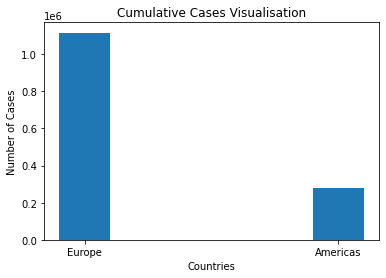

In [206]:
#cases visualisation
plt.bar(['Europe', 'Americas'], [(df3[df3['region']=='Europe']['cases'].mean()), (df3[df3['region']=='Americas']['cases'].mean())], width = 0.2)
plt.xlabel("Countries")
plt.ylabel("Number of Cases")
plt.title('Cumulative Cases Visualisation')
plt.show()

Europe has more cases than Americas, which shows that Europe has been badly affected than Americas

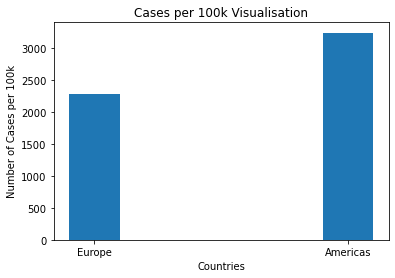

In [178]:
#cases100k visualisation
plt.bar(['Europe', 'Americas'], [(df3[df3['region']=='Europe']['cases100k'].mean()), (df3[df3['region']=='Americas']['cases100k'].mean())], width = 0.2)
plt.xlabel("Countries")
plt.ylabel("Number of Cases per 100k")
plt.title('Cases per 100k Visualisation')
plt.show()

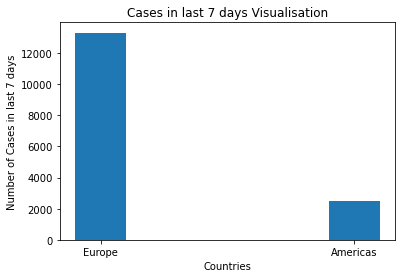

In [179]:
#cases7days visualisation
plt.bar(['Europe', 'Americas'], [(df3[df3['region']=='Europe']['cases7days'].mean()), (df3[df3['region']=='Americas']['cases7days'].mean())], width = 0.2)
plt.xlabel("Countries")
plt.ylabel("Number of Cases in last 7 days")
plt.title('Cases in last 7 days Visualisation')
plt.show()

Europe has more cases increasing in the last 7 days than Americas, which shows that the spread in Europe is exponential than Americas, measures need to be taken to control the spread.

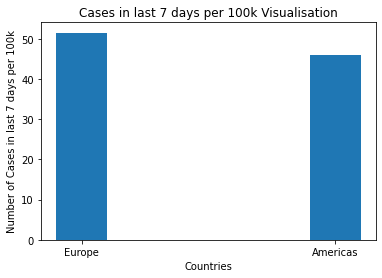

In [180]:
#cases7days100k visualisation
plt.bar(['Europe', 'Americas'], [(df3[df3['region']=='Europe']['cases7days100k'].mean()), (df3[df3['region']=='Americas']['cases7days100k'].mean())], width = 0.2)
plt.xlabel("Countries")
plt.ylabel("Number of Cases in last 7 days per 100k")
plt.title('Cases in last 7 days per 100k Visualisation')
plt.show()

Europe has more cases increasing in the last 7 days per 100k population than Americas, which shows that the spread in Europe is vast than Americas

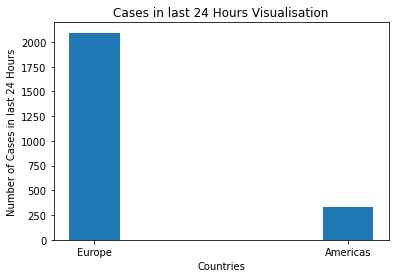

In [181]:
#cases24h visualisation
plt.bar(['Europe', 'Americas'], [(df3[df3['region']=='Europe']['cases24h'].mean()), (df3[df3['region']=='Americas']['cases24h'].mean())], width = 0.2)
plt.xlabel("Countries")
plt.ylabel("Number of Cases in last 24 Hours")
plt.title('Cases in last 24 Hours Visualisation')
plt.show()

Europe has more cases in the last 24 hours than Americas, analysis concludes that Europe is widely affected than America by COVID

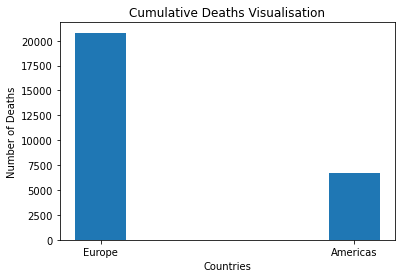

In [182]:
#further insights
#deaths visualisation
plt.bar(['Europe', 'Americas'], [(df3[df3['region']=='Europe']['deaths'].mean()), (df3[df3['region']=='Americas']['deaths'].mean())], width = 0.2)
plt.xlabel("Countries")
plt.ylabel("Number of Deaths")
plt.title('Cumulative Deaths Visualisation')
plt.show()

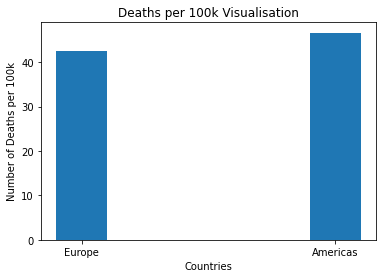

In [183]:
#deaths100k visualisation
plt.bar(['Europe', 'Americas'], [(df3[df3['region']=='Europe']['deaths100k'].mean()), (df3[df3['region']=='Americas']['deaths100k'].mean())], width = 0.2)
plt.xlabel("Countries")
plt.ylabel("Number of Deaths per 100k")
plt.title('Deaths per 100k Visualisation')
plt.show()

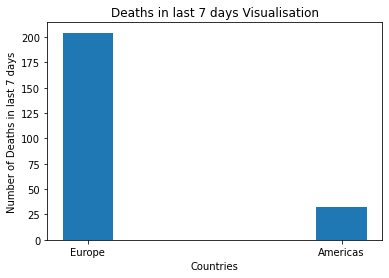

In [184]:
#deaths7days visualisation
plt.bar(['Europe', 'Americas'], [(df3[df3['region']=='Europe']['deaths7days'].mean()), (df3[df3['region']=='Americas']['deaths7days'].mean())], width = 0.2)
plt.xlabel("Countries")
plt.ylabel("Number of Deaths in last 7 days")
plt.title('Deaths in last 7 days Visualisation')
plt.show()

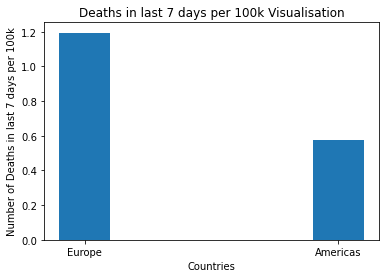

In [185]:
#deaths7days100k visualisation
plt.bar(['Europe', 'Americas'], [(df3[df3['region']=='Europe']['deaths7days100k'].mean()), (df3[df3['region']=='Americas']['deaths7days100k'].mean())], width = 0.2)
plt.xlabel("Countries")
plt.ylabel("Number of Deaths in last 7 days per 100k")
plt.title('Deaths in last 7 days per 100k Visualisation')
plt.show()

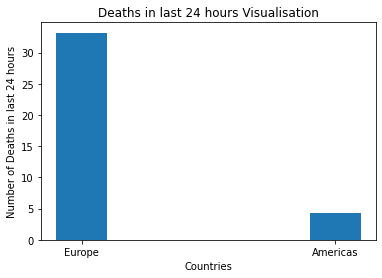

In [186]:
#deaths24h visualisation
plt.bar(['Europe', 'Americas'], [(df3[df3['region']=='Europe']['deaths24h'].mean()), (df3[df3['region']=='Americas']['deaths24h'].mean())], width = 0.2)
plt.xlabel("Countries")
plt.ylabel("Number of Deaths in last 24 hours")
plt.title('Deaths in last 24 hours Visualisation')
plt.show()

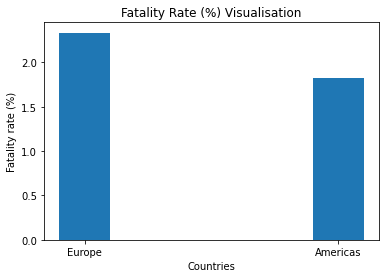

In [187]:
#fatality rate visualisation
plt.bar(['Europe', 'Americas'], [(df3[df3['region']=='Europe']['fatality rate'].mean()), (df3[df3['region']=='Americas']['fatality rate'].mean())], width = 0.2)
plt.xlabel("Countries")
plt.ylabel("Fatality rate (%)")
plt.title('Fatality Rate (%) Visualisation')
plt.show()

Based on the previous plots and the plot beside, we can conclude that the spread of Covid-19 in Europe was massive than America.


Hence, it is true that THAT EUROPE HAS BEEN AFFECTED WORSE THAN AMERICA BY COVID

# Extra Insight

Further on the brighter side, we see America having a lower cumulative deaths and cases. Economy is recovering and they have better healthcare facilities. 

Extra attention is needed towards the lifestyle and healthcare facilities of Europe where cases and deaths are high. There is a possibility of poor immunity of people due to their fast food trends. These concerns need to be addressed.